***

# Dimensão Fractal e Rede Livre de Escala

**Ano de Publicação:** 14 de Julho de 2023

* [Fagundes, R. L.](https://github.com/renabridged/renabridged)


Mestrando em Física Estatítica

Departamento de Física - DFI/UFLA, Lavras, MG.

e-mail: renan_lucas@id.uff.br



***

### Verifique se as seguinte bibliotecas estão instaladas

***
* powerlaw (método utilizado para fitar adequadamente distribuições de calda pesada)
  Link: https://pypi.org/project/powerlaw/
* intertools
* Collections
***

### Métodos e as classes para análise

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random


from scale_free_network_fractal_analysis import *

%matplotlib inline

## Gerando um fractal com uma dimensão fractal específica

In [2]:
# lista com o número de pontos a ser gerado a cada camada
etas = [1, 1, 1, 1, 1, 9]

In [3]:
# fator de redução dos raio do círculo
lambs = [10, 0.2, 10, 0.5, 10, 4]

In [4]:
# coordenadas da origem, raios e número inicial de pontos que serão gerados
x0, y0, R, n = 0, 0, 10, 2

In [5]:
# criando o objeto sp para a construção dos pontos
sp = SoneiraPeebles(x0, y0, R, n)

In [6]:
# gerando os pontos na primeira camada
sp.first_level()

'Points generated!'

In [7]:
# criando as variáveis para armagenas as coordenadas dos pontos
xt, yt = sp.points()

In [8]:
# interando sobre o número de pontos em cada camadas e gerando mais pontos 
# circulos com raios menores
for i in range(len(etas)):
    sp.levels(xt, yt, lambs[i], etas[i])
    xt, yt = sp.points()

In [9]:
# obtendo todos os pontos gerados
x, y = sp.points()

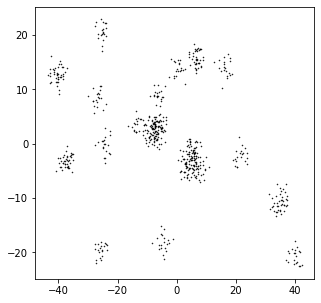

In [10]:
# plotando os pontos dos fractal

plt.figure(figsize=(5,5))
plt.plot(x, y, 'o', c='black', markersize=0.5)
#plt.axis('off')
plt.show()

In [11]:
# verificando a quantidade de pontos gerados
len(x)

640

In [12]:
# definindo a dimensão fractal segundo o modelo de Soneira-Peebles
def soneira_peebles_fractal_dimension(eta, lamb):
    return np.log(eta)/np.log(lamb)

In [13]:
# os valores de eta e lamb são valores das últimas camadas:
# número de pontos na última camada
eta = 9

# fator de redução do raio do círculo da última camada
lamb = 4

In [14]:
# estimando a dimensão fractal com o método box-counting
soneira_peebles_fractal_dimension(eta, lamb)

1.5849625007211563

In [15]:
# armazenando as coordenadas dos pontos gerados em um dataframe
df = pd.DataFrame({'x':x,'y':y})

In [16]:
# salvando as coordenadas dos pontos gerados em um csv

In [17]:
# descomente as linhas abaixo se deseja salvar as coordenadas dos pontos em um csv

# path = "coloque aqui o caminho do diterório onde quer salvar os pontos"

# df.to_csv(path + 'xy_coords_fractal.csv', index=False)

In [18]:
# criando uma função para normalizar as coordenadas
# não esqueça de normalizar os dados antes 

def normalizar_coordenadas(x, y):
    
    def normalizar(k, x):
        
        xmin, xmax = min(x), max(y)
        
        return (k-xmin)/(xmax-xmin)
    
    u = [normalizar(k, x) for k in x]
    v = [normalizar(k, y) for k in y]
    
    return u, v

# Estimando a dimensão fractal dos pontos

In [19]:
# normalizando as coordenadas (agora as coordenadas estão no intervalo 0 < x, y < 0)

xf, yf = normalizar_coordenadas(df.x.to_list(), df.y.to_list())

In [20]:
# gerando os pares ordedanos com as coordenadas normalizadas

coords = list(zip(xf, yf))

In [21]:
# definindo os limites da caixa envolvente aos pontos

# box = xmin, xmax, ymin, ymax
box = 0, 1, 0, 1

In [22]:
# gerando as 30 escalas para as caixas no intervalo 0 < x < 1

escalas = list(np.linspace(0.01, 1, 30))

In [23]:
# criando o objeto para calcular a dimensão fractal

fractal = FractalDimension(coords, escalas, box)

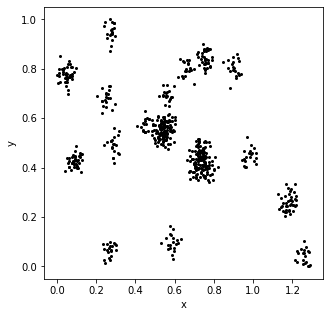

In [24]:
# vizualizando os pontos do fractal

fractal.show()

In [25]:
# calculando a dimensão fractal pelo método box-counting

fractal.dimension()

Fractal dimension: 1.21


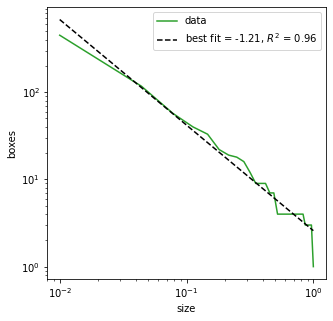

In [26]:
# encontrando o melhor fit (não esqueça de importar a biblioteca "powerlaw" antes de gerar o fit)
fractal.best_fit()

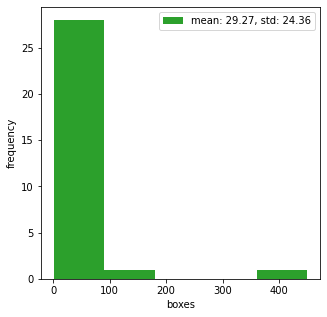

In [27]:
# vizualizando o histograma das caixas geradas
fractal.histogram()

# Gerando a Rede Livre de Escala com os Pontos do Fractal

In [28]:
# gerando os ids, as posições e o dicionário com os nos posicionados

nos = df.index.to_list()

pos = list(zip(df.x, df.y))

dict_nos_pos = dict(zip(nos, pos))

In [29]:
# criando o objeto para gerar a rede
  
network = ScaleFreeNetwork(dict_nos_pos)

In [30]:
# gerando uma rede vazia para receber os links de acordo com o
# mecanismo de crescimento e ligação preferencial

G = network.generate_network()

In [31]:
# definindo o número inicial de ligações 

m = 10

# definindo o número de interações

n = 500

# gerando a rede livre de escala 

H = network.connect_network_with_degree_probability(G, m, n)

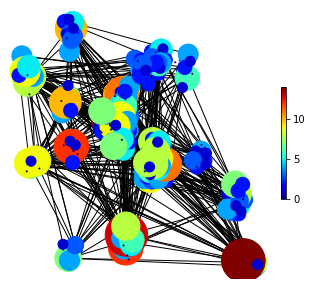

In [32]:
# vizualizando a rede de acordo com o número de ligações de seus nós

network.plot_scale_free_network(H, dict_nos_pos, figsize=(5,5), node_size = 100)

In [33]:
# calculando os graus das rede e a probabilidade associada

degree, probability = network.obtain_probability_distribution(H)

Calculating best minimal value for power law fit


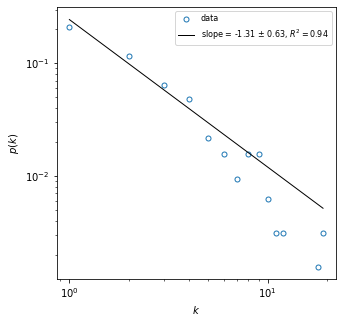

In [34]:
# despresando os nós com grau zero

degree_sem_zeros, probability_sem_zeros = degree[1:], probability[1:]

# gerando o fit da distribuição de grau

network.fit_probability_distribution(degree_sem_zeros, probability_sem_zeros, "$k$", "$p(k)$", figsize=(5,5))

# Referências

[1] Molontay, R. Fractal Characterization of Complex Networks. MSc Thesis. Budapest University of Technology and Economics Institute of Mathematics Department of Stochastics. 2015. [https://math.bme.hu/~molontay/Msc_MolontayR.pdf].

[2] Bunde, A. Havlin, S. Fractal in Science. Springer-Verlag. 1994.

[3] Barabási, A. L. Network Science. Cambridge University Press, 2016. [http://networksciencebook.com/].

[4] P.J.E. Peebles, The fractal galaxy distribution, Physica D: Nonlinear Phenomena, Volume 38, Issues 1–3, 1989, Pages 273-278, ISSN 0167-2789, [https://doi.org/10.1016/0167-2789(89)90205-4].

[5] D. H. Rothman. Modeling Environmental Complexity. Lecture notes for 12.086/12.58, MIT. 2014.